<a href="https://colab.research.google.com/github/anjalipatel101/481_Project_Fall_2023/blob/official_np/breed_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/imsparsh/animal-breed-cats-and-dogs"
)



In [ ]:
from google.colab import drive

#used for unmounting the drive
drive.flush_and_unmount()

drive.mount('/content/drive')

#Unzip archive.zip for access to animal images
!unzip '/content/drive/MyDrive/archive4.zip'


In [ ]:
!pip install -q kaggle


!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download imsparsh/animal-breed-cats-and-dogs

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip animal-breed-cats-and-dogs.zip

unzip:  cannot find or open animal-breed-cats-and-dogs.zip, animal-breed-cats-and-dogs.zip.zip or animal-breed-cats-and-dogs.zip.ZIP.


In [15]:
import pathlib
import os
import imghdr
data_dir = '/content/data_dir/TRAIN'

In [16]:
import numpy as np
import pandas as pd
import os

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [20]:
directory = '/content/Cats-and-Dogs-Breed-Dataset-main/TRAIN'
directory2 = '/content/Cats-and-Dogs-Breed-Dataset-main/TEST'

In [21]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['american_pit_bull_terrier', 'yorkshire_terrier', 'birman', 'havanese', 'samoyed', 'bengal', 'miniature_pinscher', 'persian', 'egyptian_mau', 'chihuahua', 'sphynx', 'maine_coon', 'american_bulldog', 'siamese', 'german_shorthaired', 'leonberger', 'bombay', 'scottish_terrier', 'keeshond', 'pug', 'abyssinian', 'shiba_inu', 'basset_hound', 'pomeranian', 'english_setter', 'english_cocker_spaniel', 'british_shorthair', 'russian_blue', 'ragdoll', 'beagle', 'great_pyrenees', 'staffordshire_bull_terrier', 'japanese_chin', 'saint_bernard', 'boxer', 'newfoundland', 'wheaten_terrier']
37


In [22]:
mapping={ 'basset_hound':0, 'beagle':1, 'russian_blue':2, 'pomeranian':3, 'ragdoll':4,
         'staffordshire_bull_terrier':5, 'keeshond':6, 'siamese':7, 'pug':8, 'shiba_inu':9,
         'american_pit_bull_terrier':10, 'bengal':11, 'british_shorthair':12, 'newfoundland':13,
         'havanese':14, 'japanese_chin':15, 'german_shorthaired':16, 'birman':17, 'maine_coon':18,
         'english_cocker_spaniel':19, 'scottish_terrier':20, 'wheaten_terrier':21, 'chihuahua':22,
         'american_bulldog':23, 'abyssinian':24, 'boxer':25, 'yorkshire_terrier':26, 'miniature_pinscher':27,
         'sphynx':28, 'samoyed':29, 'leonberger':30, 'bombay':31, 'english_setter':32, 'persian':33,
         'great_pyrenees':34, 'egyptian_mau':35, 'saint_bernard':36 }

In [23]:
dataset=[]
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])
    count=count+1

In [24]:
test=[]
testfile=[]

for file in os.listdir(directory2):
    path=os.path.join(directory2,file)
    image=load_img(path, grayscale=False, color_mode='rgb', target_size=(180,180))
    image=img_to_array(image)
    image=image/255.0
    test+=[image]
    testfile+=[file]

In [26]:
data,labels0=zip(*dataset)

In [27]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [28]:
data=np.array(data)
test=np.array(test)

In [29]:
data2=data.reshape(-1,180,180,3)
test2=test.reshape(-1,180,180,3)

In [30]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [31]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4712, 180, 180, 3)
(1178, 180, 180, 3)
(4712, 37)
(1178, 37)


In [32]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [33]:
pretrained_model3 = tf.keras.applications.DenseNet121(input_shape=(180,180,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [35]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(37, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10
148/148 [==============================] - 662s 4s/step - loss: 2.1850 - accuracy: 0.4047 - val_loss: 0.7514 - val_accuracy: 0.7530
Epoch 2/10
148/148 [==============================] - 666s 5s/step - loss: 1.2585 - accuracy: 0.6108 - val_loss: 0.6483 - val_accuracy: 0.7895
Epoch 3/10
148/148 [==============================] - 675s 5s/step - loss: 1.0360 - accuracy: 0.6785 - val_loss: 0.5619 - val_accuracy: 0.8115
Epoch 4/10
106/148 [====================>.........] - ETA: 2:26 - loss: 0.9355 - accuracy: 0.7123

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

37/37 [==============================] - 128s 3s/step
              precision    recall  f1-score   support

           0       0.71      0.23      0.34        22
           1       1.00      0.94      0.97        33
           2       0.81      0.72      0.76        29
           3       0.96      0.84      0.90        31
           4       1.00      0.96      0.98        27
           5       0.84      0.72      0.78        36
           6       0.85      0.85      0.85        40
           7       1.00      0.66      0.79        32
           8       0.94      0.79      0.86        39
           9       0.80      0.77      0.79        31
          10       0.96      0.87      0.91        30
          11       0.84      0.87      0.86        31
          12       0.69      0.86      0.76        28
          13       0.75      0.94      0.84        35
          14       0.84      0.86      0.85        36
          15       1.00      0.91      0.95        34
          16       0.93    

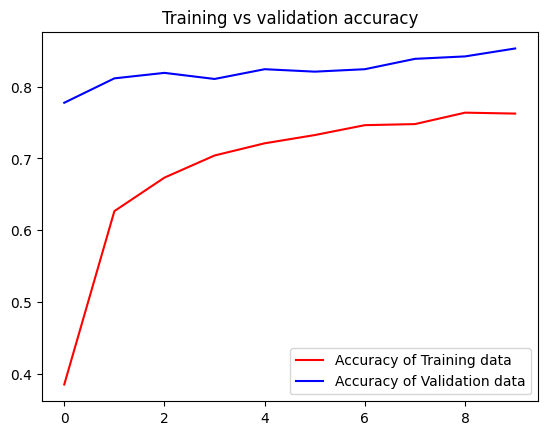

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

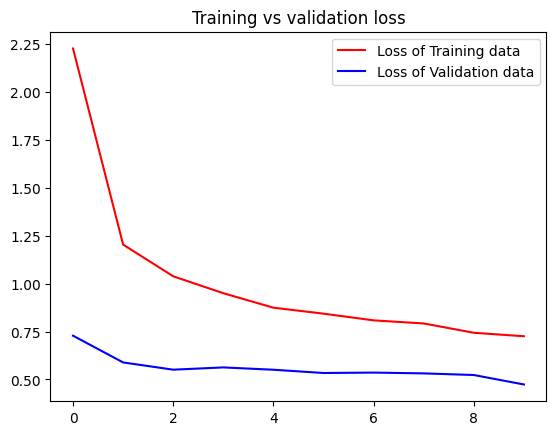

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

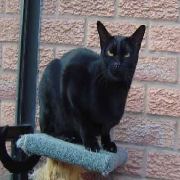

In [ ]:
load_img("/content/data_dir/TEST/1020.jpg",target_size=(180,180))

In [14]:
image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

NameError: ignored

In [13]:
reverse_mapping={  0:'basset_hound', 1:'beagle', 2:'russian_blue', 3:'pomeranian', 4:'ragdoll',
         5:'staffordshire_bull_terrier', 6:'keeshond', 7:'siamese', 8:'pug', 9:'shiba_inu',
         10:'american_pit_bull_terrier', 11:'bengal', 12:'british_shorthair', 13:'newfoundland',
         14:'havanese', 15:'japanese_chin', 16:'german_shorthaired', 17:'birman', 18:'maine_coon',
         19:'english_cocker_spaniel', 20:'scottish_terrier', 21:'wheaten_terrier', 22:'chihuahua',
         23:'american_bulldog', 24:'abyssinian', 25:'boxer', 26:'yorkshire_terrier', 27:'miniature_pinscher',
         28:'sphynx', 29:'samoyed', 30:'leonberger', 31:'bombay', 32:'english_setter', 33:'persian',
         34:'great_pyrenees', 35:'egyptian_mau', 36:'saint_bernard' }

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("The breed of the animal is {}.".format(move_name))

NameError: ignored

In [ ]:
#This is where the color recognition will be placed

In [ ]:
#Outputing the supplemental information

if value == 0:      #Basset Hound
    print("Known for their distinctive, long ears and droopy expression.")
    print("Excellent sense of smell, traditionally used in hunting." )
    print("Generally friendly, affectionate, and good with families.\n")

elif value == 1:      #Beagle
    print("Small to medium-sized with a friendly and curious demeanor.")
    print("Keen sense of smell, often used in detection work.")
    print("Energetic and requires regular exercise.\n")

elif value == 2:      #Russian Blue
    print("Recognized for striking blue-gray coat and vivid green eyes.")
    print("Reserved nature, forming strong bonds with owners.")
    print("Low-shedding and hypoallergenic.\n")

elif value == 3:      #Pomeranian
    print("Small, fluffy dogs with a lively and extroverted personality.")
    print("Distinctive fox-like face and a luxurious double coat.")
    print("Bold and confident, making them good watchdogs.\n")

elif value == 4:      #Ragdoll
    print("Cats with striking blue eyes, silky coat, and docile temperament.")
    print("Tend to go limp when picked up, known for gentle nature.")
    print("Sociable cats that enjoy the company of their owners.\n")

elif value == 5:      #Staffordshire Bull Terrier
    print("Muscular and agile dogs with loyalty and affection.")
    print("Generally good with children and a friendly disposition.")
    print("Proper training and socialization are crucial.\n")

elif value == 6:      #Keeshond
    print("Medium-sized dogs with a spectacles appearance.")
    print("Friendly and outgoing nature, excellent companions.")
    print("Thick double coat requires regular grooming.\n")

elif value == 7:      #Siamese
    print("Recognized for striking blue almond-shaped eyes and color-point coat.")
    print("Highly vocal and interactive with owners.")
    print("Intelligent cats requiring mental stimulation.\n")

elif value == 8:      #Pug
    print("Compact size, wrinkled face, and curled tail.")
    print("Playful and sociable nature, suitable for various households.")
    print("Prone to weight gain, sensitive to extreme temperatures./n")

elif value == 9:      #Shiba Inu
    print("Japanese breed with a fox-like appearance.")
    print("Independent nature, forming strong bonds once comfortable.")
    print("Strong prey drive, requiring early training and socialization./n")

elif value == 10:     #American Pit Bull Terrier
    print("Strong, athletic dogs with loyalty and affection.")
    print("Good with children when trained and socialized.")
    print("Responsible ownership and positive reinforcement are crucial./n")

elif value == 11:     #Bengal
    print("Cats with a distinctive spotted or marbled coat.")
    print("Energetic and playful, may enjoy climbing.")
    print("Intelligent cats requiring mental stimulation./n")

elif value == 12:     #British Shorthair
    print("Recognized for round faces, dense coat, and large eyes.")
    print("Calm and easygoing temperament.")
    print("Adaptable to various living environments.\n")


elif value == 13:     #Newfoundland
    print("Large and powerful dogs with a gentle and sweet nature.")
    print("Excellent swimmers, used in water rescue work.")
    print("Good with children, patient demeanor.\n")

elif value == 14:     #Havanese
    print("Small, sturdy dogs with a long, silky coat.")
    print("Friendly disposition, good with children and other pets.")
    print("Regular grooming is essential.\n")

elif value == 15:     #Japanese Chin
    print("Small, elegant dogs with a distinctive oriental appearance.")
    print("Friendly and gentle temperament.")
    print("Entertaining antics and may form strong bonds.\n")

elif value == 16:     #German Shorthaired Pointer
    print("Versatile hunting dogs with athleticism and intelligence.")
    print("Short coat, highly energetic, requiring regular exercise.")
    print("Friendly and trainable, excellent family pets.\n")

elif value == 17:     #Birman
    print("Cats with striking blue almond-shaped eyes and color-point markings.")
    print("Gentle and affectionate nature.")
    print("Relatively low-maintenance grooming.\n")

elif value == 18:     #Maine Coon
    print("One of the largest domestic cat breeds.")
    print("Friendly and sociable, often good with children.")
    print("Prized for intelligence and adaptability.\n")

elif value == 19:     #English Cocker Spaniel
    print("Medium-sized dogs with a long, silky coat.")
    print("Friendly and affectionate, suitable for families.")
    print("Regular exercise and mental stimulation needed.\n")

elif value == 20:     #Scottish Terrier
    print("Small dogs with a distinctive wiry coat.")
    print("Dignified and independent nature.")
    print("Proper training and socialization are essential.\n")

elif value == 21:     #Wheaten Terrier
    print("Medium-sized dogs with a soft, wheaten-colored coat.")
    print("Playful nature, good with children and other pets.")
    print("Regular grooming required.")

elif value == 22:     #Chihuahua
    print("One of the smallest dog breeds, with a bold personality.")
    print("Can exhibit a confident attitude despite their size.")
    print("Excellent companions for individuals or families in smaller living spaces.\n")

elif value == 23:     #American Bulldog
    print("Muscular, athletic dogs known for strength and loyalty.")
    print("Friendly and outgoing, often good with children.")
    print("Regular exercise and mental stimulation are important.\n")

elif value == 24:     #Abyssinian
    print("Medium-sized cats with a short, ticked coat.")
    print("Playful and active nature, enjoys climbing.")
    print("Social cats that may form strong bonds.\n")

elif value == 25:     #Boxer
    print("Medium to large-sized dogs with a strong, muscular build.")
    print("Friendly, intelligent, and protective.")
    print("Regular exercise is crucial for maintaining physical health.\n")

elif value == 26:     #Yorkshire Terrier
    print("Yorkies are small dogs with long, silky fur and a confident attitude.")
    print("They're smart and can learn tricks and activities quickly.")
    print("Even though they're tiny, they need playtime and mental stimulation to stay happy.\n")

elif value == 27:     #Miniature Pinscher
    print("Small dogs with a compact build, known for their spirited nature.")
    print("Display a fearless attitude despite their small size.")
    print("Early socialization and training are essential.\n")

elif value == 28:     #Sphynx
    print("Hairless cats with distinctive large ears and wrinkled skin.")
    print("Require regular bathing to remove oils from their skin.")
    print("Described as affectionate and enjoying attention.\n")

elif value == 29:     #Samoyed
    print("Large, fluffy dogs with a distinctive \"Sammy smile.\"")
    print("Friendly, sociable, and often good with children.")
    print("Regular grooming is essential to manage shedding.\n")

elif value == 30:     #Leonberger
    print("Large, majestic dogs with a lion-like mane.")
    print("Gentle and friendly temperament, good with children.")
    print("Require regular exercise and mental stimulation.\n")

elif value == 31:     #Bombay
    print("Medium-sized cats with a sleek, black coat.")
    print("Friendly and affectionate, forming strong bonds.")
    print("Often described as \"mini-panthers.\"\n")

elif value == 32:     #English Setter
    print("Medium to large-sized dogs with a silky coat.")
    print("Known for a gentle and friendly demeanor.")
    print("Moderate energy level, enjoys outdoor activities.\n")

elif value == 33:     #Persian
    print("Cats known for a long, luxurious coat, flat face, and expressive eyes.")
    print("Calm and laid-back personality, prefers a quiet indoor environment.")
    print("Regular grooming is essential to prevent matting.\n")

elif value == 34:     #Great Pyrenees
    print("Giant dogs known for a thick, weather-resistant double coat.")
    print("Calm and gentle nature, often showing a strong protective instinct.")
    print("Regular grooming and consistent training are important.\n")

elif value == 35:     #Egyptian Mau
    print("Medium-sized cats with a spotted coat resembling wild leopards.")
    print("Active and playful nature, enjoys climbing and interactive play.")
    print("May form strong bonds with owners and appreciate mental stimulation.\n")

elif value == 36:     #Saint Bernard
    print("Giant dogs with a gentle and friendly disposition.")
    print("Often good with children and calm indoors.")
    print("Require regular grooming and may drool due to loose jowls.")


In [ ]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

pred2=[]
for item in prediction2:
    value2=np.argmax(item)
    move_name2=mapper(value2)
    pred2+=[move_name2]

(1500, 180, 180, 3)
47/47 [==============================] - 157s 3s/step
(1500, 37)


In [ ]:
print(testfile[0:3])
print(pred2[0:3])
print(len(testfile))
print(len(pred2))

['352.jpg', '1103.jpg', '1485.jpg']
['russian_blue', 'yorkshire_terrier', 'staffordshire_bull_terrier']
1500
1500


In [ ]:
numbers=[]
for item in testfile:
    s=item[0:-4]
    numbers+=[int(s)]

In [ ]:
result = pd.DataFrame(testfile)
result[1] = pred2
result[2] = numbers
result.columns = ['Filename','Class','Numbers']
print(result)

      Filename                       Class  Numbers
0      352.jpg                russian_blue      352
1     1103.jpg           yorkshire_terrier     1103
2     1485.jpg  staffordshire_bull_terrier     1485
3      976.jpg                newfoundland      976
4     1085.jpg                     persian     1085
...        ...                         ...      ...
1495  1182.jpg      english_cocker_spaniel     1182
1496   617.jpg                      beagle      617
1497  1166.jpg                   shiba_inu     1166
1498   340.jpg   american_pit_bull_terrier      340
1499   834.jpg           british_shorthair      834

[1500 rows x 3 columns]


In [ ]:
result2=result.sort_values('Numbers').reset_index(drop=True)
result3=result2.drop('Numbers',axis=1)
print(result3)

      Filename               Class
0        1.jpg              bombay
1        2.jpg      great_pyrenees
2        3.jpg       japanese_chin
3        4.jpg  german_shorthaired
4        5.jpg   yorkshire_terrier
...        ...                 ...
1495  1496.jpg          maine_coon
1496  1497.jpg           chihuahua
1497  1498.jpg                 pug
1498  1499.jpg    american_bulldog
1499  1500.jpg          pomeranian

[1500 rows x 2 columns]
